## Ground truth
Top 10 most and least affected countries has been taken from [German Watch](https://www.germanwatch.org/sites/default/files/2025-02/Climate%20Risk%20Index%202025.pdf)

In [58]:
top_10_affected = ['Dominica', 'China', 'Honduras', 'Myanmar', 'Italy', 'India','Greece', 'Spain', 'Vanuatu', 'Philippines']
bottom_10_affected = ['Iceland', 'Russia', 'Luxembourg', 'Estonia', 'Finland','Norway', 'Sweden', 'Denmark', 'Singapore', 'Saudi Arabia']

### ECONOMICAL ASPECTS

**RQ#1** *Do countries with higher GDP per Capita tend to exhibit lower climate vulnerability?*

In [135]:
import pandas as pd

df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
df_climate['Country'] = df_climate['Country'].str.strip()
df_climate['GDP per Capita (USD)'] = df_climate['GDP per Capita (USD)'].astype(str).str.replace(',', '')
df_climate['GDP per Capita (USD)'] = pd.to_numeric(df_climate['GDP per Capita (USD)'], errors='coerce')
df_climate['ND-GAIN Vulnerability Score'] = pd.to_numeric(df_climate['ND-GAIN Vulnerability Score'], errors='coerce')
selected_countries = top_10_affected + bottom_10_affected
df_filtered = df_climate[df_climate['Country'].isin(selected_countries)][['Country', 'GDP per Capita (USD)', 'ND-GAIN Vulnerability Score']].dropna().reset_index(drop=True)

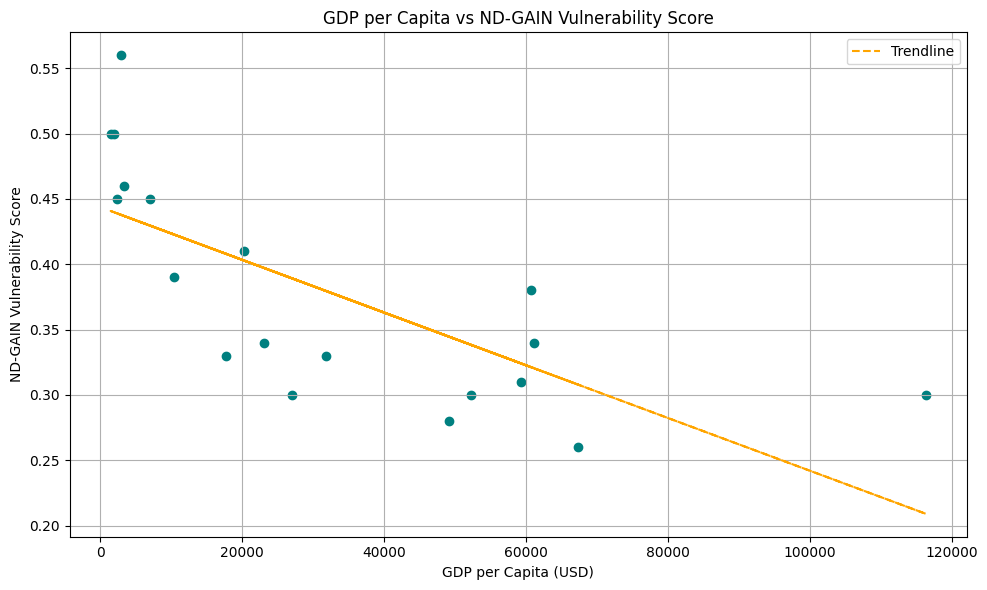

In [136]:
import matplotlib.pyplot as plt
import numpy as np

x = df_filtered['GDP per Capita (USD)']
y = df_filtered['ND-GAIN Vulnerability Score']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='teal')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='orange', linestyle='--', label='Trendline')
plt.title('GDP per Capita vs ND-GAIN Vulnerability Score')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('ND-GAIN Vulnerability Score')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### ECONOMICAL ASPECTS

**RQ#2** *How does a country’s expenditure on environmental protection, relative to its GDP, influence its climate vulnerability?*

In [137]:
import pandas as pd

df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
gov_expenditure_data = pd.read_csv('./datasets-drive/Investment_GovernmentExpenditure_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')

df_climate['Country'] = df_climate['Country'].str.strip()
gov_expenditure_data['Area'] = gov_expenditure_data['Area'].str.strip()
df_climate['GDP per Capita (USD)'] = df_climate['GDP per Capita (USD)'].astype(str).str.replace(',', '')
df_climate['GDP per Capita (USD)'] = pd.to_numeric(df_climate['GDP per Capita (USD)'], errors='coerce')
df_climate['ND-GAIN Vulnerability Score'] = pd.to_numeric(df_climate['ND-GAIN Vulnerability Score'], errors='coerce')

env_exp_usd = gov_expenditure_data[
    (gov_expenditure_data['Item'].str.contains('Environmental protection', case=False, na=False)) &
    (gov_expenditure_data['Element'].str.contains(r'Value US\$', case=False, na=False))
]

env_exp_usd = env_exp_usd.sort_values('Year', ascending=False).drop_duplicates('Area')
env_exp_usd = env_exp_usd[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Env_Exp_USD'})
env_exp_usd['Env_Exp_USD'] = pd.to_numeric(env_exp_usd['Env_Exp_USD'], errors='coerce')

climate_features = df_climate[['Country', 'GDP per Capita (USD)', 'ND-GAIN Vulnerability Score']]
merged_df = pd.merge(env_exp_usd, climate_features, on='Country', how='inner')
merged_df = merged_df.dropna().reset_index(drop=True)
selected_countries = top_10_affected + bottom_10_affected

merged_df = merged_df[merged_df['Country'].isin(selected_countries)].reset_index(drop=True)

merged_df['Vulnerability_Level'] = pd.cut(
    merged_df['ND-GAIN Vulnerability Score'],
    bins=[0, 0.4, 0.6, 1.0],
    labels=['High', 'Moderate', 'Low']
)


/var/folders/33/tmt_dn957d99k_t2zvbqlw_40000gn/T/ipykernel_17725/989257858.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_exp_by_vul = merged_df.groupby('Vulnerability_Level')['Env_Exp_USD'].mean().sort_index()


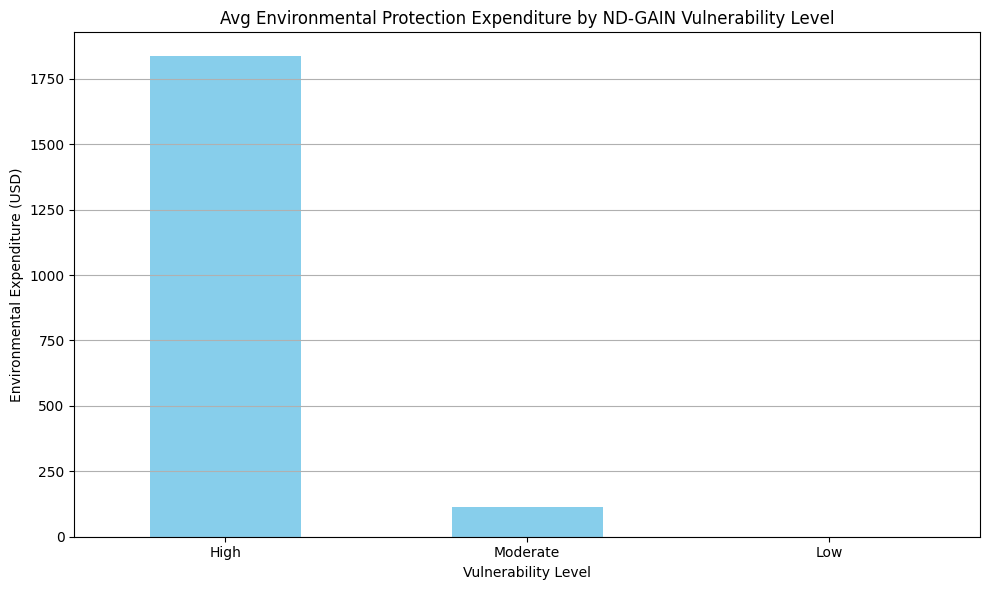

In [138]:
import matplotlib.pyplot as plt

avg_exp_by_vul = merged_df.groupby('Vulnerability_Level')['Env_Exp_USD'].mean().sort_index()

plt.figure(figsize=(10, 6))
avg_exp_by_vul.plot(kind='bar', color='skyblue')

plt.title('Avg Environmental Protection Expenditure by ND-GAIN Vulnerability Level')
plt.xlabel('Vulnerability Level')
plt.ylabel('Environmental Expenditure (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### DEMOGRAPHICAL ASPECTS

**RQ#3** *Do countries with higher birth rates or younger population have greater climate stress?*

In [139]:
import pandas as pd

df_demo = pd.read_csv('./datasets/3-countries-demographic-stats.csv')
df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')
df_social = pd.read_csv('./datasets/7-social_data.csv')

df_demo['Country'] = df_demo['Country'].str.strip()
df_climate['Country'] = df_climate['Country'].str.strip()
df_social['Country'] = df_social['Country'].str.strip()

demo_features = df_demo[['Country', 'Births per Day']]
climate_features = df_climate[['Country', 'ND-GAIN Vulnerability Score']]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = df_social[df_social['Indicator'].str.contains('0-14', case=False, na=False)]
age_data = age_data.sort_values('Year', ascending=False).drop_duplicates('Country')
age_data['Country'] = age_data['Country'].str.strip()
age_data['Value'] = age_data['Value'].astype(str).str.strip().str.split('/').str[0].str.strip()
age_data['Value'] = pd.to_numeric(age_data['Value'], errors='coerce')
age_features = age_data[['Country', 'Value']].rename(columns={'Value': '% Population aged 0-14'})


merged_df = pd.merge(demo_features, age_features, on='Country', how='left')
merged_df = pd.merge(merged_df, climate_features, on='Country', how='left')
merged_df['High_Vulnerability'] = merged_df['Country'].apply(lambda x: 1 if x.strip() in top_10_affected else (0 if x.strip() in bottom_10_affected else None))
merged_df = merged_df[merged_df['High_Vulnerability'].notnull()].reset_index(drop=True)

merged_df['Births per Day'] = merged_df['Births per Day'].astype(str).str.replace(',', '', regex=False)
merged_df['Births per Day'] = pd.to_numeric(merged_df['Births per Day'], errors='coerce')
merged_df['% Population aged 0-14'] = pd.to_numeric(merged_df['% Population aged 0-14'], errors='coerce')
merged_df['ND-GAIN Vulnerability Score'] = pd.to_numeric(merged_df['ND-GAIN Vulnerability Score'], errors='coerce')

print("Merged clean dataset:")
display(merged_df.head())


Merged clean dataset:


,Country,Births per Day,% Population aged 0-14,ND-GAIN Vulnerability Score,High_Vulnerability
0,China,23845,17.6,0.39,1.0
1,Dominica,2,NaN,0.45,1.0
2,Denmark,162,16.3,0.34,0.0
3,Spain,904,14.2,0.30,1.0
4,Estonia,29,16.5,0.34,0.0


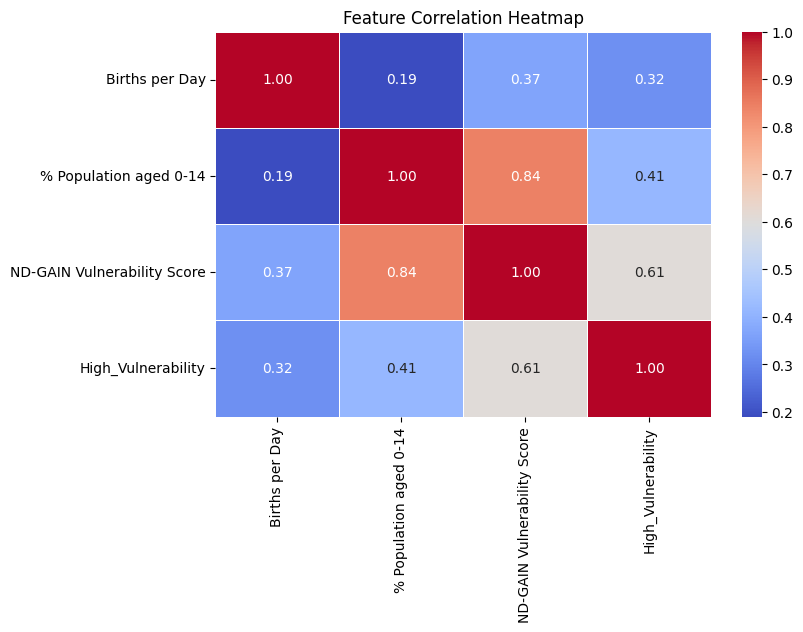

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
corr = merged_df[['Births per Day', '% Population aged 0-14', 'ND-GAIN Vulnerability Score', 'High_Vulnerability']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

### DEMOGRAPHICAL ASPECTS

**RQ#4** *How do population density and the degree of urbanization jointly influence a country's climate vulnerability, and do highly urbanized yet densely populated regions experience compounded climate stress?*

In [219]:
import pandas as pd

top_10_affected = ['Dominica', 'China', 'Honduras', 'Myanmar', 'Italy', 'India', 'Greece', 'Spain', 'Vanuatu', 'Philippines']
bottom_10_affected = ['Iceland', 'Russia', 'Luxembourg', 'Estonia', 'Finland', 'Norway', 'Sweden', 'Denmark', 'Singapore', 'Saudi Arabia']
target_countries = top_10_affected + bottom_10_affected

df_density = pd.read_csv('./datasets/5-general_data.csv')
df_urban = pd.read_csv('./datasets-drive/Population_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')

df_density.columns = df_density.columns.str.strip()
df_density['Country'] = df_density['Country'].str.strip()
df_urban['Area'] = df_urban['Area'].str.strip()
df_climate['Country'] = df_climate['Country'].str.strip()

density_filtered = df_density[df_density['Indicator'].str.contains('Pop. density', case=False, na=False)]
density_filtered = density_filtered[['Country', 'Value']].rename(columns={'Value': 'Pop. density'})
density_filtered['Pop. density'] = density_filtered['Pop. density'].astype(str).str.extract(r'([\d\.]+)').astype(float)
density_filtered = density_filtered.rename(columns={'Pop. density': 'Population Density'})

urban_filtered = df_urban[(df_urban['Element'].str.contains('Urban population', case=False, na=False))]
urban_filtered = urban_filtered.sort_values('Year', ascending=False).drop_duplicates('Area')
urban_filtered = urban_filtered[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Urban_Population_%'})
urban_filtered['Urban_Population_%'] = pd.to_numeric(urban_filtered['Urban_Population_%'], errors='coerce')

df_climate['ND-GAIN Vulnerability Score'] = pd.to_numeric(df_climate['ND-GAIN Vulnerability Score'], errors='coerce')
ndgain_data = df_climate[['Country', 'ND-GAIN Vulnerability Score']]
merged_df = pd.merge(density_filtered, urban_filtered, on='Country', how='inner')
merged_df = pd.merge(merged_df, ndgain_data, on='Country', how='inner')
merged_df = merged_df[merged_df['Country'].isin(target_countries)].reset_index(drop=True)

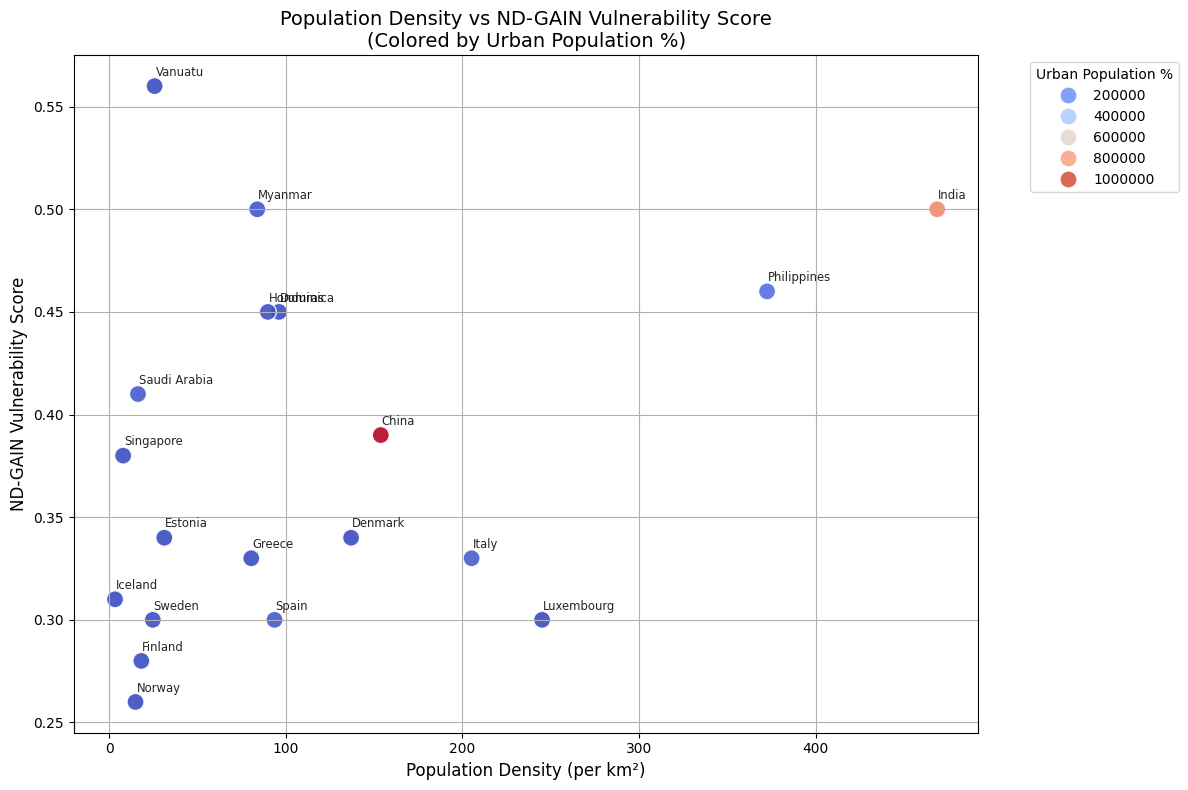

In [220]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_df,
    x='Population Density',
    y='ND-GAIN Vulnerability Score',
    hue='Urban_Population_%',
    palette='coolwarm',
    s=150,
    alpha=0.9)

for line in range(0, merged_df.shape[0]):
    plt.text(
        merged_df['Population Density'][line]+0.5,
        merged_df['ND-GAIN Vulnerability Score'][line]+0.005,
        merged_df['Country'][line],
        horizontalalignment='left',
        size='small',
        color='black',
        alpha=0.85)

plt.title('Population Density vs ND-GAIN Vulnerability Score\n(Colored by Urban Population %)', fontsize=14)
plt.xlabel('Population Density (per km²)', fontsize=12)
plt.ylabel('ND-GAIN Vulnerability Score', fontsize=12)
plt.grid(True)
plt.legend(title='Urban Population %', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### GEOGRAPHICAL ASPECT

**RQ#5** *How do population density and the degree of urbanization jointly influence a country's climate vulnerability, and do highly urbanized yet densely populated regions experience compounded climate stress?*

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv('./datasets-drive/Environment_Temperature_change_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
df = df.loc[df['Area'].isin(top_10_affected + bottom_10_affected)]
df = df.loc[df['Element'] == 'Temperature change']
df = df[['Area', 'Year', 'Value']]
df.drop_duplicates(subset=['Area', 'Year'], inplace=True)
df_top = df[df["Area"].isin(top_10_affected)]
df_bottom = df[df["Area"].isin(bottom_10_affected)]

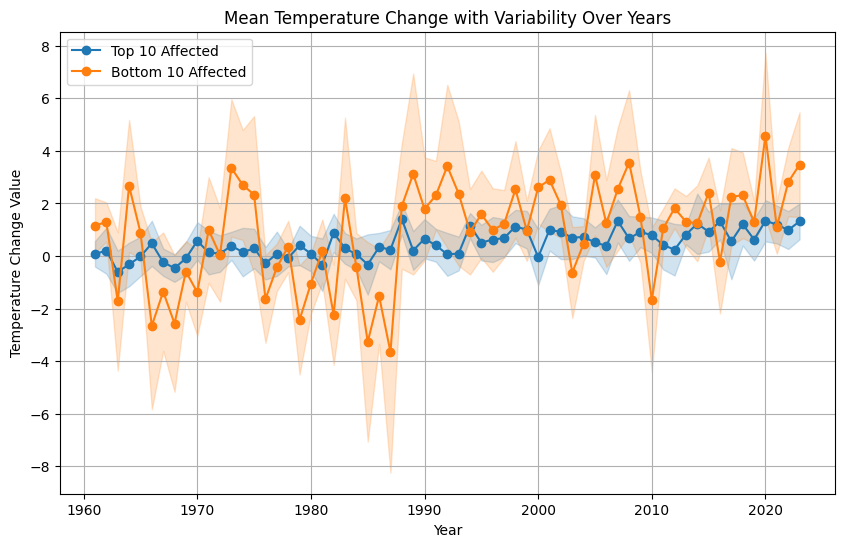

In [150]:
stats_top = df_top.groupby("Year")["Value"].agg(["mean", "std"])
stats_bottom = df_bottom.groupby("Year")["Value"].agg(["mean", "std"])

plt.figure(figsize=(10, 6))
plt.plot(
    stats_top.index,
    stats_top["mean"],
    marker="o",
    color="tab:blue",
    label="Top 10 Affected",
)
plt.fill_between(
    stats_top.index,
    stats_top["mean"] - stats_top["std"],
    stats_top["mean"] + stats_top["std"],
    color="tab:blue",
    alpha=0.2,
)

plt.plot(
    stats_bottom.index,
    stats_bottom["mean"],
    marker="o",
    color="tab:orange",
    label="Bottom 10 Affected",)
plt.fill_between(
    stats_bottom.index,
    stats_bottom["mean"] - stats_bottom["std"],
    stats_bottom["mean"] + stats_bottom["std"],
    color="tab:orange",
    alpha=0.2,)
plt.title("Mean Temperature Change with Variability Over Years")
plt.xlabel("Year")
plt.ylabel("Temperature Change Value")
plt.legend()
plt.grid(True)
plt.show()

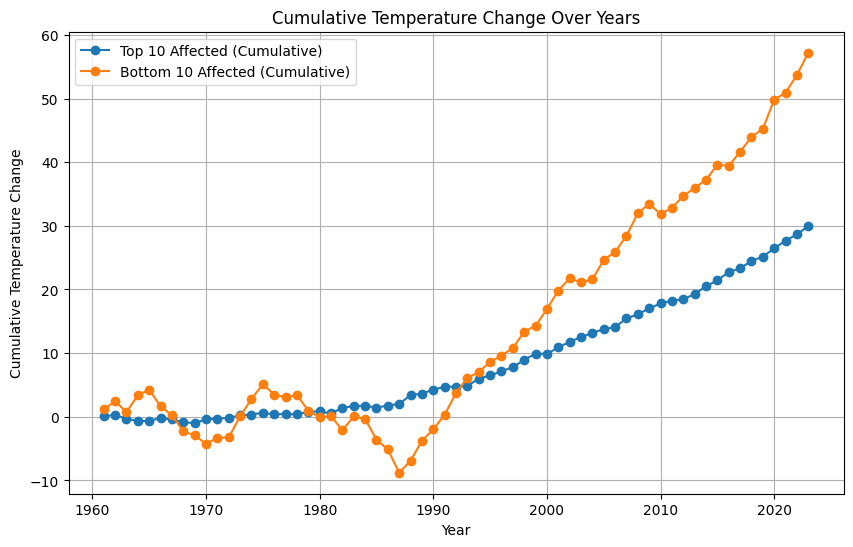

In [151]:
avg_top = df_top.groupby("Year")["Value"].mean()
avg_bottom = df_bottom.groupby("Year")["Value"].mean()
cumsum_top = avg_top.cumsum()
cumsum_bottom = avg_bottom.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(
    cumsum_top.index,
    cumsum_top.values,
    marker="o",
    label="Top 10 Affected (Cumulative)")
plt.plot(
    cumsum_bottom.index,
    cumsum_bottom.values,
    marker="o",
    label="Bottom 10 Affected (Cumulative)")
plt.title("Cumulative Temperature Change Over Years")
plt.xlabel("Year")
plt.ylabel("Cumulative Temperature Change")
plt.legend()
plt.grid(True)
plt.show()

### GEOGRAPHICAL ASPECT

**RQ#6** *How do geo-environmental indicators such as forest density, protected land use, inland water resources, and average temperature change correlate with national climate vulnerability (ND-GAIN score) across different regions?*

In [221]:
import pandas as pd

df_area = pd.read_csv('./datasets/1-population-data.csv')
df_forest = pd.read_csv('./datasets-drive/Inputs_LandUse_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
df_landuse = pd.read_csv('./datasets-drive/Inputs_LandUse_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
df_temp = pd.read_csv('./datasets-drive/Environment_Temperature_change_E_All_Data_(Normalized).csv', encoding='ISO-8859-1')
df_climate = pd.read_csv('./datasets/4-countries-climate-watchdata.csv')

top_10_affected = ['Dominica', 'China', 'Honduras', 'Myanmar', 'Italy', 'India','Greece', 'Spain', 'Vanuatu', 'Philippines']
bottom_10_affected = ['Iceland', 'Russia', 'Luxembourg', 'Estonia', 'Finland','Norway', 'Sweden', 'Denmark', 'Singapore', 'Saudi Arabia']
target_countries = top_10_affected + bottom_10_affected

df_area.columns = df_area.columns.str.strip()
df_forest.columns = df_forest.columns.str.strip()
df_landuse.columns = df_landuse.columns.str.strip()
df_temp.columns = df_temp.columns.str.strip()
df_climate.columns = df_climate.columns.str.strip()

In [247]:
area_col = [col for col in df_area.columns if 'area' in col.lower()][0]
df_area.rename(columns={area_col: 'Land Area (km²)'}, inplace=True)
df_area['Land Area (km²)'] = pd.to_numeric(df_area['Land Area (km²)'], errors='coerce')
land_area = df_area[['Country', 'Land Area (km²)']]
# .query('Country in @target_countries')

forest = df_forest[df_forest['Item'].str.contains('Forest land', case=False)]
# forest = forest[forest['Area'].isin(target_countries)]
forest = forest.sort_values(['Area', 'Year'], ascending=[True, False]).drop_duplicates('Area')
forest_area = forest[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Forest Area (1000 ha)'})


temp = df_temp[df_temp['Element'].str.contains('Temperature change', case=False)]
# temp = temp[temp['Area'].isin(target_countries)]
temp = temp.sort_values(['Area', 'Year'], ascending=[True, False]).drop_duplicates('Area')
avg_temp = temp[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Avg Temp Change (°C)'})

water = df_landuse[df_landuse['Item'].str.contains('Inland waters', case=False)]
# water = water[water['Area'].isin(target_countries)]
water = water.sort_values(['Area', 'Year'], ascending=[True, False]).drop_duplicates('Area')
water_reserve = water[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Inland Waters (1000 ha)'})

protected = df_landuse[df_landuse['Item'].str.contains('Cropland area under protective cover', case=False)]
# protected = protected[protected['Area'].isin(target_countries)]
protected = protected.sort_values(['Area', 'Year'], ascending=[True, False]).drop_duplicates('Area')
protected_land = protected[['Area', 'Value']].rename(columns={'Area': 'Country', 'Value': 'Protected Land (1000 ha)'})

geo_df = land_area.merge(forest_area, on='Country', how='outer')
geo_df = geo_df.merge(avg_temp, on='Country', how='outer')
geo_df = geo_df.merge(water_reserve, on='Country', how='outer')
geo_df = geo_df.merge(protected_land, on='Country', how='outer')
geo_df = pd.merge(geo_df, df_climate[['Country', 'ND-GAIN Vulnerability Score']], on='Country', how='left')
display(geo_df)

,Country,Land Area (km²),Forest Area (1000 ha),Avg Temp Change (°C),Inland Waters (1000 ha),Protected Land (1000 ha),ND-GAIN Vulnerability Score
0,Afghanistan,652200.0,1.208440e+03,-2.200,63.0000,NaN,0.59
1,Africa,NaN,6.286636e+05,0.825,43896.2798,NaN,NaN
2,Albania,28700.0,7.889000e+02,2.704,33.0000,1.99,0.40
3,Algeria,2400000.0,1.968111e+03,0.010,NaN,13.22,0.38
4,American Samoa,199.0,1.707000e+01,0.815,NaN,NaN,NaN
...,...,...,...,...,...,...,...
323,World,NaN,4.048946e+06,1.702,442956.9921,NaN,NaN
324,Yemen,528000.0,5.490000e+02,NaN,NaN,0.29,0.54
325,Yugoslav SFR,NaN,9.116420e+03,0.746,121.0000,NaN,NaN
326,Zambia,752600.0,4.443760e+04,0.810,922.0000,NaN,NaN


In [270]:
import pandas as pd
import plotly.express as px
import zipfile

cols_to_convert = [
    'ND-GAIN Vulnerability Score',
    'Forest Area (1000 ha)',
    'Avg Temp Change (°C)',
    'Protected Land (1000 ha)',
    'Inland Waters (1000 ha)',
    'Land Area (km²)'
]
geo_df[cols_to_convert] = geo_df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
geo_df['Protected Land (1000 ha)'] = geo_df['Protected Land (1000 ha)'].fillna(0)
geo_df['Inland Waters (1000 ha)'] = geo_df['Inland Waters (1000 ha)'].fillna(0)
geo_df['Forest Area per km²'] = (geo_df['Forest Area (1000 ha)'] * 100) / geo_df['Land Area (km²)']
geo_df['Protected Land per km²'] = (geo_df['Protected Land (1000 ha)'] * 100) / geo_df['Land Area (km²)']
geo_df['Inland Water per km²'] = (geo_df['Inland Waters (1000 ha)'] * 100) / geo_df['Land Area (km²)']

map_configs = [
    ("ND-GAIN Vulnerability Score", "OrRd", "./maps/1-ndgain_score.html", "ND-GAIN Vulnerability Score by Country"),
    ("Forest Area per km²", "YlGn", "./maps/2-forest_area_normalized.html", "Normalized Forest Area per km² of Land"),
    ("Avg Temp Change (°C)", "RdBu", "./maps/3-avg_temp_change.html", "Average Temperature Change (°C) by Country"),
    ("Protected Land per km²", "PuBu", "./maps/4-protected_land_normalized.html", "Normalized Protected Land per km²"),
    ("Inland Water per km²", "Blues", "./maps/5-inland_waters_normalized.html", "Normalized Inland Water per km²")
]

html_files = []
for col, cmap, file_name, title in map_configs:
    fig = px.choropleth(
        geo_df,
        locations="Country",
        locationmode="country names",
        color=col,
        hover_name="Country",
        hover_data={"ND-GAIN Vulnerability Score": True},
        color_continuous_scale=cmap,
        title=title,
        projection="natural earth")
    fig.write_html(file_name)
    html_files.append(file_name)

print("All maps are generated successfully!")

All maps are generated successfully!
